In [1]:
!pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\praaj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'google.colab'

# Using Disparity Map

In [6]:
from google.colab import output
output.enable_custom_widget_manager()

import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load images
left_img = cv2.imread('birdie-2.jpg', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('birdie-1.jpg', cv2.IMREAD_GRAYSCALE)

def compute_disparity(numDisparities_slider_val, blockSize):
    # OpenCV requires numDisparities to be divisible by 16
    numDisparities = numDisparities_slider_val * 16
    blockSize = max(5, min(blockSize, 255))
    blockSize = blockSize if blockSize % 2 else blockSize + 1

    stereo = cv2.StereoBM_create(
        numDisparities=numDisparities,
        blockSize=blockSize
    )
    disparity = stereo.compute(left_img, right_img)
    return disparity.astype(np.float32) / 16.0  # Normalize for display

# Create sliders with valid ranges
numDisparities_slider = widgets.IntSlider(
    value=1,  # 1 * 16 = 16 disparities
    min=1,
    max=8,     # 2 * 16 = 32 disparities (max for your example)
    step=1,
    description='numDisparities (x16):'
)

blockSize_slider = widgets.IntSlider(
    value=15,
    min=5,
    max=51,
    step=2,
    description='blockSize:'
)

out = widgets.Output()

def update(change):
    with out:
        out.clear_output(wait=True)
        disparity = compute_disparity(
            numDisparities_slider.value,
            blockSize_slider.value
        )
        plt.figure(figsize=(16, 6))  # Wider figure for side-by-side layout

        # Left image
        plt.subplot(1, 2, 1)
        plt.imshow(right_img, cmap='gray')
        plt.title('Right Image (birdie-1.jpg)')

        # Disparity map with a different colormap (e.g., 'jet')
        plt.subplot(1, 2, 2)
        plt.imshow(disparity, cmap='jet', vmin=0, vmax=2)
        plt.title('Disparity Map (jet)')
        plt.colorbar()

        plt.tight_layout()
        plt.show()

numDisparities_slider.observe(update, names='value')
blockSize_slider.observe(update, names='value')

display(widgets.VBox([numDisparities_slider, blockSize_slider, out]))
update(None)


In [7]:
from google.colab import output
output.enable_custom_widget_manager()

import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load images
left_img = cv2.imread('watch_2.jpg', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('watch_0.jpg', cv2.IMREAD_GRAYSCALE)

def compute_disparity(numDisparities_slider_val, blockSize):
    # OpenCV requires numDisparities to be divisible by 16
    numDisparities = numDisparities_slider_val * 16
    blockSize = max(5, min(blockSize, 255))
    blockSize = blockSize if blockSize % 2 else blockSize + 1

    stereo = cv2.StereoBM_create(
        numDisparities=numDisparities,
        blockSize=blockSize
    )
    disparity = stereo.compute(left_img, right_img)
    return disparity.astype(np.float32) / 16.0  # Normalize for display

# Create sliders with valid ranges
numDisparities_slider = widgets.IntSlider(
    value=1,  # 1 * 16 = 16 disparities
    min=1,
    max=4,     # 2 * 16 = 32 disparities (max for your example)
    step=1,
    description='numDisparities (x16):'
)

blockSize_slider = widgets.IntSlider(
    value=15,
    min=5,
    max=51,
    step=2,
    description='blockSize:'
)

out = widgets.Output()

def update(change):
    with out:
        out.clear_output(wait=True)
        disparity = compute_disparity(
            numDisparities_slider.value,
            blockSize_slider.value
        )
        plt.figure(figsize=(16, 6))  # Wider figure for side-by-side layout

        # Left image
        plt.subplot(1, 2, 1)
        plt.imshow(left_img, cmap='gray')
        plt.title('Left Image (watch_2.jpg)')

        # Disparity map with a different colormap (e.g., 'jet')
        plt.subplot(1, 2, 2)
        plt.imshow(disparity, cmap='jet', vmin=0, vmax=2)
        plt.title('Disparity Map (jet)')
        plt.colorbar()

        plt.tight_layout()
        plt.show()

numDisparities_slider.observe(update, names='value')
blockSize_slider.observe(update, names='value')

display(widgets.VBox([numDisparities_slider, blockSize_slider, out]))
update(None)


# Semi-Global Block Matching (SGBM)

In [8]:
from google.colab import output
output.enable_custom_widget_manager()

import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load your images
left_img = cv2.imread('birdie-2.jpg', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('birdie_0.jpg', cv2.IMREAD_GRAYSCALE)

if left_img is None or right_img is None:
    raise FileNotFoundError("Could not load one or both images. Check file paths.")

def compute_disparity_sgbm(num_disparities, block_size, uniqueness_ratio):
    # Ensure parameters are valid
    h, w = left_img.shape
    num_disparities = num_disparities * 16
    block_size = max(5, min(block_size, min(h, w), 255))
    if block_size % 2 == 0:
        block_size += 1
    uniqueness_ratio = max(5, min(uniqueness_ratio, 100))

    stereo = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=num_disparities,
        blockSize=block_size,
        P1=8*1*block_size**2,
        P2=32*1*block_size**2,
        disp12MaxDiff=25,
        preFilterCap=0,
        uniquenessRatio=uniqueness_ratio,
        speckleWindowSize=50,
        speckleRange=2
    )
    disparity = stereo.compute(left_img, right_img)
    return disparity.astype(np.float32) / 16.0  # Normalize

# Create sliders
num_disp_slider = widgets.IntSlider(value=2, min=1, max=4, description='numDisparities (x16):')
block_size_slider = widgets.IntSlider(value=15, min=5, max=21, step=2, description='Block Size:')
uniqueness_slider = widgets.IntSlider(value=15, min=5, max=50, description='Uniqueness Ratio:')

out = widgets.Output()

def update(change):
    with out:
        out.clear_output(wait=True)
        disparity = compute_disparity_sgbm(
            num_disp_slider.value,
            block_size_slider.value,
            uniqueness_slider.value
        )
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(left_img, cmap='gray')
        plt.title('Left Image')
        plt.subplot(1, 2, 2)
        plt.imshow(disparity, cmap='viridis', vmin=0, vmax=64)
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.title('SGBM Disparity Map')
        plt.show()

num_disp_slider.observe(update, names='value')
block_size_slider.observe(update, names='value')
uniqueness_slider.observe(update, names='value')

display(widgets.VBox([num_disp_slider, block_size_slider, uniqueness_slider, out]))
update(None)


In [9]:
from google.colab import output
output.enable_custom_widget_manager()

import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load your images
left_img = cv2.imread('watch_3.jpg', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('watch_0.jpg', cv2.IMREAD_GRAYSCALE)

if left_img is None or right_img is None:
    raise FileNotFoundError("Could not load one or both images. Check file paths.")

def compute_disparity_sgbm(num_disparities, block_size, uniqueness_ratio):
    # Ensure parameters are valid
    h, w = left_img.shape
    num_disparities = num_disparities * 16
    block_size = max(5, min(block_size, min(h, w), 255))
    if block_size % 2 == 0:
        block_size += 1
    uniqueness_ratio = max(5, min(uniqueness_ratio, 100))

    stereo = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=num_disparities,
        blockSize=block_size,
        P1=8*1*block_size**2,
        P2=32*1*block_size**2,
        disp12MaxDiff=25,
        preFilterCap=0,
        uniquenessRatio=uniqueness_ratio,
        speckleWindowSize=50,
        speckleRange=2
    )
    disparity = stereo.compute(left_img, right_img)
    return disparity.astype(np.float32) / 16.0  # Normalize

# Create sliders
num_disp_slider = widgets.IntSlider(value=2, min=1, max=4, description='numDisparities (x16):')
block_size_slider = widgets.IntSlider(value=15, min=5, max=21, step=2, description='Block Size:')
uniqueness_slider = widgets.IntSlider(value=15, min=5, max=50, description='Uniqueness Ratio:')

out = widgets.Output()

def update(change):
    with out:
        out.clear_output(wait=True)
        disparity = compute_disparity_sgbm(
            num_disp_slider.value,
            block_size_slider.value,
            uniqueness_slider.value
        )
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(left_img, cmap='gray')
        plt.title('Left Image')
        plt.subplot(1, 2, 2)
        plt.imshow(disparity, cmap='viridis', vmin=0, vmax=64)
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.title('SGBM Disparity Map')
        plt.show()

num_disp_slider.observe(update, names='value')
block_size_slider.observe(update, names='value')
uniqueness_slider.observe(update, names='value')

display(widgets.VBox([num_disp_slider, block_size_slider, uniqueness_slider, out]))
update(None)


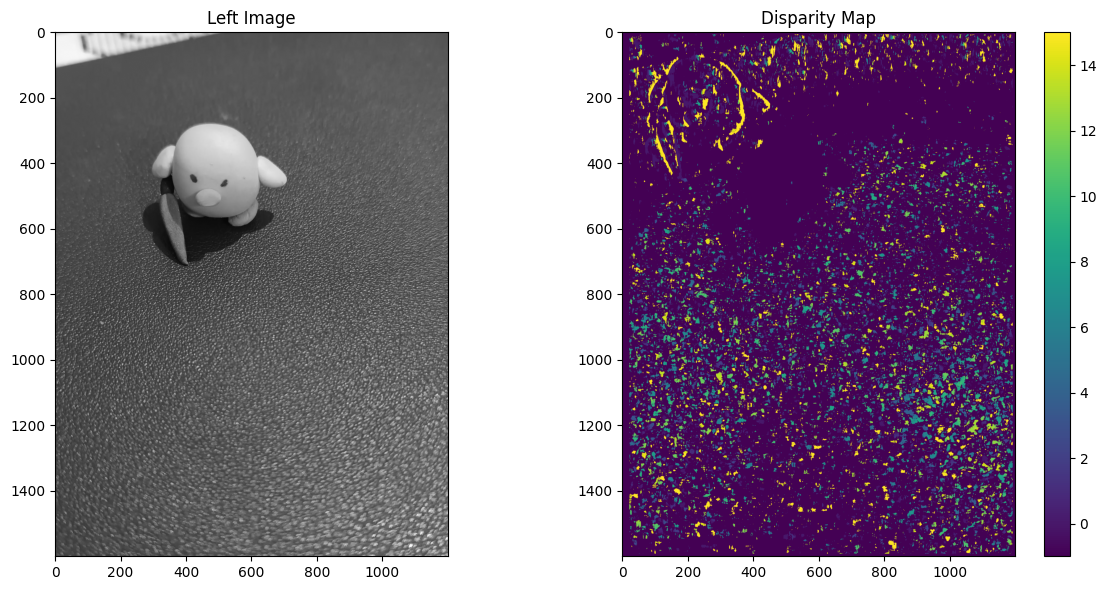

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load images and check if they exist
imgL_path = 'birdie-2.jpg'
imgR_path = 'birdie-1.jpg'

imgL = cv.imread(imgL_path, cv.IMREAD_GRAYSCALE)
imgR = cv.imread(imgR_path, cv.IMREAD_GRAYSCALE)

if imgL is None or imgR is None:
    raise FileNotFoundError(f"Could not load one or both images. Check file paths: {imgL_path}, {imgR_path}")

# Check image sizes
h, w = imgL.shape

# Ensure blockSize is odd and within valid range
blockSize = 15
if blockSize % 2 == 0:
    blockSize += 1
blockSize = max(5, min(blockSize, min(h, w), 255))

# numDisparities must be positive and divisible by 16
numDisparities = 16
if numDisparities % 16 != 0:
    numDisparities = (numDisparities // 16 + 1) * 16

# Create StereoBM object
stereo = cv.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)

# Compute disparity
raw_disparity = stereo.compute(imgL, imgR)
disparity = raw_disparity.astype(np.float32) / 16.0  # Normalize

# Display images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imgL, cmap='gray')
plt.title('Left Image')

plt.subplot(1, 2, 2)
plt.imshow(disparity, cmap='viridis')  # Use a better colormap (e.g., 'viridis', 'plasma', 'magma')
plt.colorbar()
plt.title('Disparity Map')

plt.tight_layout()
plt.show()


In [11]:
import shutil
import os

folder_path = '/content/ONNX-HITNET-Stereo-Depth-estimation/'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Deleted folder: {folder_path}")
else:
    print(f"Folder does not exist: {folder_path}")


Folder does not exist: /content/ONNX-HITNET-Stereo-Depth-estimation/


In [12]:
%ls

bird_0.jpg  bird_2.jpg  birdie_0.jpg  birdie-2.jpg  watch_0.jpg  watch_2.jpg
bird_1.jpg  bird_3.jpg  birdie-1.jpg  sample_data/  watch_1.jpg  watch_3.jpg
